In [1]:
# Como executar um outro notebook
# %run /caminho/notebook.ipynb

# leitor de jupyternotebook direto do git: https://nbviewer.jupyter.org


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

### Identificando o ambiente

In [3]:
# identificar se a execução é S.O. Windows(PC) ou não (nuvem)

import os
import platform

#diretorio corrente
diretorio_corrente = os.getcwd()
print(f'O diretório corrente é \n{diretorio_corrente}')

# S.O
sis_op = platform.system()
print(f'O Sistema Operacional é {sis_op}')


O diretório corrente é 
C:\Users\T-Gamer\Documents\Cursos\MBA\TCC\Código
O Sistema Operacional é Windows


### trabalhando Dataset

##### Carregando Dataset #2 - df_2

In [4]:
#1 - Carregando o Dataset #2 

from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",


]

df = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

# nomes das classes
y_df2_names = df.target_names


df_2 = pd.DataFrame(df.data,df.target)
df_2 = df_2.reset_index().rename(columns={'index':'target',0:'text'})


# separando textos e classes
# textos a serem tratados pelo algorimto
texts_df2 = df_2['text']

# classes de todos as ocorrências
y_df2 = df_2['target']



df.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [5]:
df.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [9]:
df2_cat = pd.Series(np.unique(df.target),df.target_names)
df2_cat

alt.atheism           0
comp.graphics         1
sci.space             2
talk.religion.misc    3
dtype: int64

In [8]:
df_2.head()

,target,text
0,0,My point is that you set up your views as the ...
1,1,\nBy '8 grey level images' you mean 8 items of...
2,1,FIRST ANNUAL PHIGS USER GROUP CONFERENCE\n\n ...
3,3,"I responded to Jim's other articles today, but..."
4,1,"\nWell, I am placing a file at my ftp today th..."


In [10]:
print('df2 - porporção por subject')
print(round(df_2.groupby(['target'])['text'].count()/df_2.shape[0]*100,2))
print(f'total: {df_2.shape[0]}')

df2 - porporção por subject
target
0    23.59
1    28.73
2    29.14
3    18.54
Name: text, dtype: float64
total: 3387


##### Data_dataset


In [11]:
  # Data_dataset

categorias = pd.Series( y_df2_names,df_2.target.unique())
df_2['subject']=df_2['target']
df_2['subject'] = df_2['target'].map(categorias)
df_2[['target','subject']]




,target,subject
0,0,alt.atheism
1,1,comp.graphics
2,1,comp.graphics
3,3,sci.space
4,1,comp.graphics
...,...,...
3382,1,comp.graphics
3383,2,talk.religion.misc
3384,2,talk.religion.misc
3385,1,comp.graphics


In [12]:

df_2.head()

,target,text,subject
0,0,My point is that you set up your views as the ...,alt.atheism
1,1,\nBy '8 grey level images' you mean 8 items of...,comp.graphics
2,1,FIRST ANNUAL PHIGS USER GROUP CONFERENCE\n\n ...,comp.graphics
3,3,"I responded to Jim's other articles today, but...",sci.space
4,1,"\nWell, I am placing a file at my ftp today th...",comp.graphics


### Visualização dos dados brutos


In [11]:
# !pip install wordcloud

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [14]:
# Agregando todos os textos
textos_df2 = " ".join(texto for texto in df_2['text'])




In [15]:
# Criando a nuvem de palavras
# wordcloud_df2 = WordCloud(background_color='white').generate(textos_df2)
wordcloud_df = WordCloud(width=800, height=400, max_font_size=100, max_words=100, min_font_size=10,background_color='white').generate(textos_df2)

Nuvem de palavras por ocorrência - dados brutos


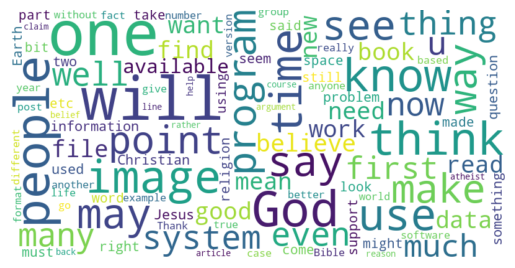

In [16]:
# Visualizando a nuvem de palavras
print('Nuvem de palavras por ocorrência - dados brutos')
plt.imshow(wordcloud_df, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
wordcloud_df.to_file("df2_brutos.png")
print(f'arquivo df2_brutos.png criado')
print('============')


arquivo df2_brutos.png criado


In [18]:
df_2.head()

,target,text,subject
0,0,My point is that you set up your views as the ...,alt.atheism
1,1,\nBy '8 grey level images' you mean 8 items of...,comp.graphics
2,1,FIRST ANNUAL PHIGS USER GROUP CONFERENCE\n\n ...,comp.graphics
3,3,"I responded to Jim's other articles today, but...",sci.space
4,1,"\nWell, I am placing a file at my ftp today th...",comp.graphics
